In [1]:
from machinelearning.mlpipeline import MLPipelines

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import optuna
import pandas as pd
# from sklearn.preprocessing import LabelEncoder ###
# from sklearn.cross_decomposition import PLSRegression

# model = LogisticRegression()
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1],
#     'penalty': ['l1', 'l2']
# }
csv_dir = 'data/composite_dataset.csv'
label = 'group'

model = LogisticRegression()
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# mlpipe = MLPipelines(estimator=model, param_grid=param_grid, label=label, csv_dir=csv_dir)
# mlpipe.normalize()

/home/spyros/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# dataloader
mlpipe = MLPipelines(estimator=model, param_grid={}, label=label, csv_dir=csv_dir)
# mlpipe._encode_labels()
mlpipe.normalize()

Label mapping: {'Factor1:CASE': 0, 'Factor1:CONTROL': 1}


In [3]:
# mlpipe.bayesian_search()
# xg = [RandomForestClassifier(), GradientBoostingClassifier(), LinearDiscriminantAnalysis(), LogisticRegression(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]
xg = [LinearDiscriminantAnalysis(), XGBClassifier(), GradientBoostingClassifier(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]

In [4]:
# fitted_mod = mlpipe.model_selection(optimizer='bayesian_search',n_trials=2,num_trials=2,score='accuracy',exclude=xg, n_iter=2, train_best='bayesian_search',return_model=True)#, exclude=[XGBClassifier()],result=True)

In [5]:
# fitted_mod

In [6]:
import pickle
filename = 'fitted.sav'
# pickle.dump(fitted_mod, open(filename, 'wb'))

In [7]:
fitted_mod = pickle.load(open(filename, 'rb'))
mlpipe.best_estimator = fitted_mod
mlpipe.name = fitted_mod.__class__.__name__

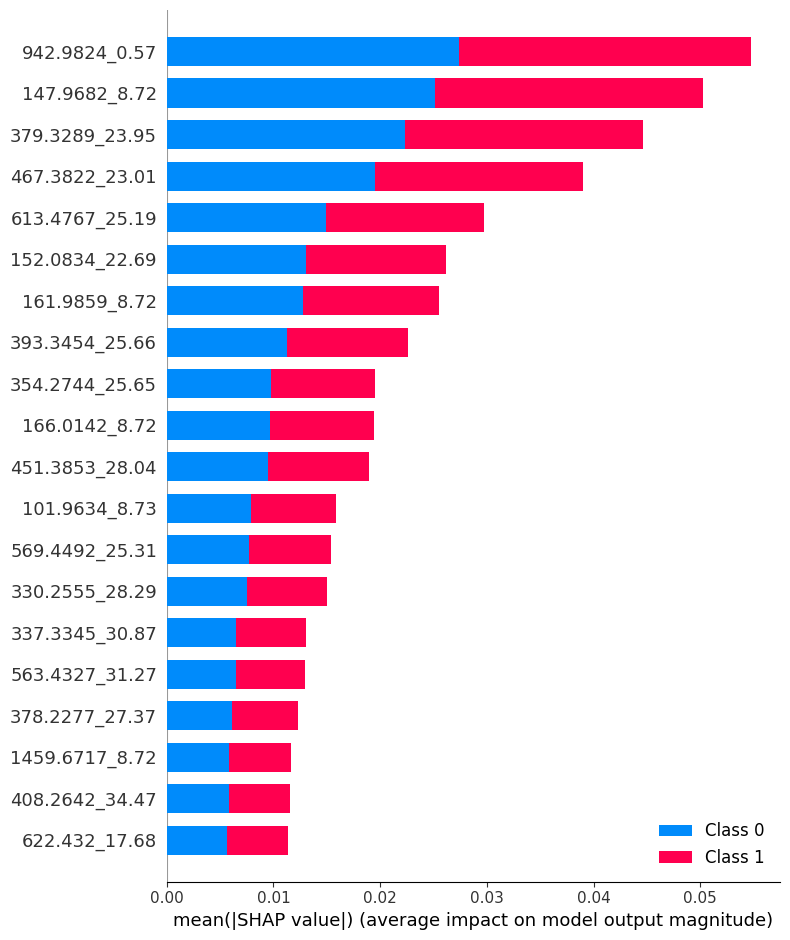

In [15]:
mlpipe.plot_shap_values(explainer_type='tree')

In [ ]:
import numpy as np
np.unique(mlpipe.y).shape

(2,)

In [ ]:
set_res = set(mlpipe.y)
list_res = (list(set_res))
 
list_res

[0, 1]

In [ ]:
def f(x):
    return fitted_mod.predict_proba(x)[:, 0]

In [ ]:
import shap

num_features = mlpipe.X.shape[1]
min_evals = 2 * num_features + 1
explainer = shap.Explainer(f, mlpipe.X)
shap_values = explainer(mlpipe.X,max_evals=min_evals)
# explainer = shap.Explainer(fitted_mod.predict_proba, mlpipe.X)
# shap_values = explainer(mlpipe.X[:20])

PermutationExplainer explainer: 72it [03:14,  2.91s/it]                        


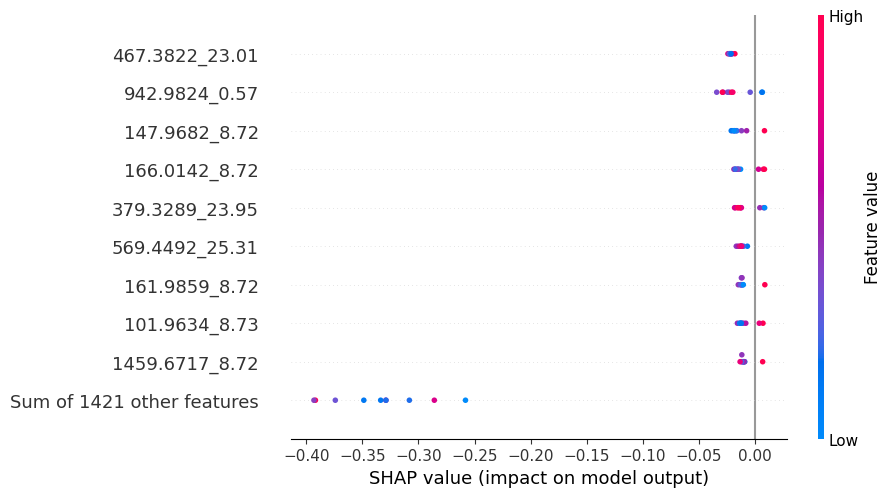

In [ ]:
shap.plots.beeswarm(shap_values)

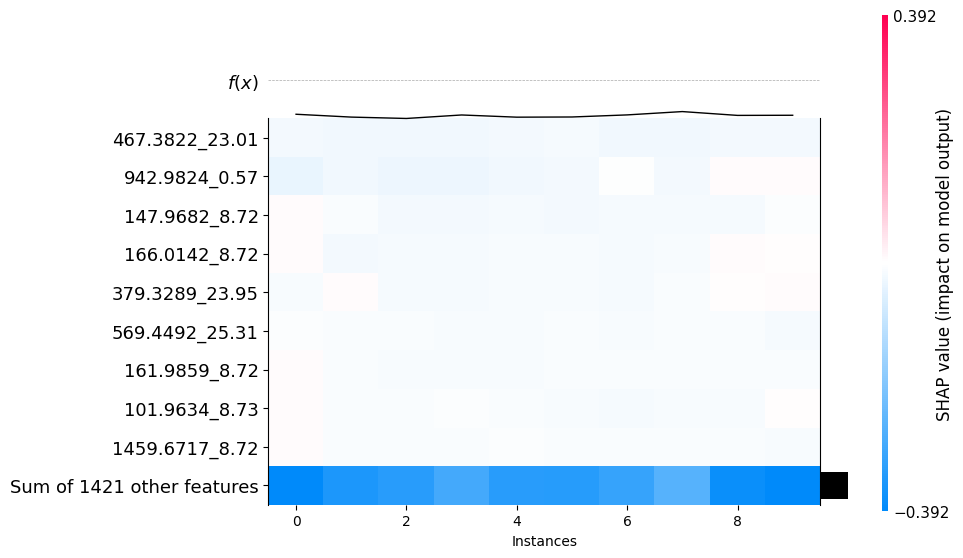

In [ ]:
shap.plots.heatmap(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1430, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [ ]:
shap.plots.waterfall(shap_values[0])

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], mlpipe.X.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
shap.initjs()

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=21,
                       min_samples_leaf=3, min_samples_split=6,
                       n_estimators=154, n_jobs=-1)

In [ ]:
class Features_explanation:#(MLPipelines):
    def __init__(self, best_estimator, param_grid, label, csv_dir):
